# PART 2
# TRI NGUYEN (33660812)
### I WORKED AND SUBMITTED ALONE

In [158]:
import pandas as pd
import numpy 
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Import dataset and preprocessing

In [159]:
### import dataset
credit_train = pd.read_csv("creditdefault_train.csv")
credit_test = pd.read_csv("creditdefault_test.csv")

# check null
print(credit_test.isnull().sum(), credit_train.isnull().sum())

print(credit_test.head())
credit_test.size

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64 Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64
   Y      X1  X2  X3  X4  X5  X6  X7  X8  X9  ...    X14    X15    X16    X17  \
0  1  120000   2   2   2  26  -1   2   0   0  ...   2682   3272   3455   3261   
1  0   90000   2   2   2  34   0   0   0   0  ...  13559  14331  14948  15549   
2  0  140000   2   3   1  28   0   0   2   0  ...  12108  12211  11793   3719   
3  0   20000   1   3   2  35  -2  -2  -2  -2  ...      0      0  13007  13912   
4  0  200000   2   3   2  34   0   0   2   0  ...   5535   2513   1828   3731   

    X18   X19   X20    X21   X22   X23  
0     0  1000 

360000

# Creating train sets and test sets

In [160]:
train_x = credit_train.drop(columns=["Y"]).values
train_y = credit_train["Y"].values
test_x = credit_test.drop(columns=["Y"]).values
test_y = credit_test["Y"].values

# check shapes of sets
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(15000, 23) (15000,) (15000, 23) (15000,)


# RandomizedSearchCV for models evaluation
- With dataset size of 15000 rows x 24 columns (360000 elements), RandomizedSearchCV is a better and more efficient choice than GridSearchCV when doing evaluations on multiple models and multiple set of hyperparameters combinations.
- RandomizedSearchCV samples a fixed number of random params combinations between different models, and is like to find optimal hyperparams with significantly fewer evaluations.

In [161]:
# Defining models 
models = {
    'Random Forest': sklearn.ensemble.RandomForestClassifier(),
    'Decision Tree': sklearn.tree.DecisionTreeClassifier(), 
    'KNN': sklearn.neighbors.KNeighborsClassifier()
}

In [162]:
# Defining the hyperparanmeters of the respective models
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20, 30, 40, 50]},
    'Decision Tree': {'max_depth': [5, 10, 20, 30, 40, 50, None],'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 10]}, 'criterion': ['gini', 'entropy', 'log_loss'],
    'KNN': {'n_neighbors': [5, 10, 20, 50, 100, 200], 'metric': ['euclidean', 'manhattan', 'minkowski'], 'p': [1, 2], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
}

In [163]:
from sklearn.model_selection import RandomizedSearchCV

# Initialise RandomizedSearchCV and run by loop
best_models = {}
for model_name, model in models.items():
    random_search = RandomizedSearchCV (
        model, param_grid[model_name], 
        cv=5, 
        scoring='accuracy', 
        n_jobs=-1, 
        n_iter=30,
        random_state=42,
        verbose=1)
    random_search.fit(train_x, train_y)
    best_models[model_name] = random_search.best_estimator_
    print(f"{model_name} Best hyperparameters: {random_search.best_params_}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Random Forest Best hyperparameters: {'n_estimators': 300, 'max_depth': 10}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Decision Tree Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
KNN Best hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 200, 'metric': 'euclidean', 'algorithm': 'brute'}


# Evaluate models with their respective optimal hyperparameters

In [164]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for model_name, model in best_models.items():
    predict = model.predict(test_x)
    accuracy = accuracy_score(test_y, predict)
    precision = precision_score(test_y, predict, average='weighted')
    recall = recall_score(test_y, predict, average='weighted')
    f1 = f1_score(test_y, predict, average='weighted')

    print(model_name)
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)


Random Forest
Accuracy: 0.8189333333333333
Precision: 0.8015452981132075
Recall: 0.8189333333333333
F1 Score: 0.7966167578908554
Decision Tree
Accuracy: 0.8169333333333333
Precision: 0.7994445845185714
Recall: 0.8169333333333333
F1 Score: 0.7903949269082176
KNN
Accuracy: 0.7799333333333334
Precision: 0.7283508555022852
Recall: 0.7799333333333334
F1 Score: 0.7001601843353232


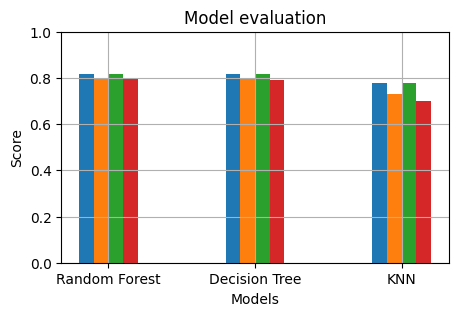

In [165]:
# plot the results 
fig, ax = plt.subplots(figsize=(5, 3))
x = numpy.arange(len(results['Model']))
width = 0.1

# set bars
ax.bar(x - 1.5 * width, results['Accuracy'], width, label='Accuracy')
ax.bar(x - 0.5 * width, results['Precision'], width, label='Precision')
ax.bar(x + 0.5 * width, results['Recall'], width, label='Recall')
ax.bar(x + 1.5 * width, results['F1 Score'], width, label='F1 Score')

# labels
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model evaluation')
ax.set_xticks(x)
ax.set_xticklabels(results['Model'])

plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Takeaway 
- Random Forest Classifier is the best performing model for the dataset
- Decision Tree performs similar to Random forest, but is slightly lower on all metrics
- KNN is underperform on all metrics when compares to Random Forest and Decision Tree

# Doing exhaustive hyperparameters tuning on Random Forest Classifier with GridSearchCV
- Further refining hyperparameters for optimal performance 

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_leaf': [1, 2, 4, 8],  
    'min_samples_split': [2, 5, 10], 
    'max_features': ['sqrt', 'log2'], 
    'bootstrap': [True, False] 
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                        param_grid=param_grid, 
                        cv=5, 
                        n_jobs=-1,  
                        verbose=0, 
                        scoring='neg_mean_absolute_error')

In [168]:
grid_search.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='neg_mean_absolute_error')

In [169]:
print("Best parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)

Best parameters:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score:  0.17673333333333333


In [170]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(test_x, test_y)
print("Accuracy:", accuracy)

Accuracy: 0.8184
